In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O4','C4']
psi_dihedral=['C1','O4','C4','C5']

di_sugar=['NDG', 'NDG']
di_sugar2= ['DGlcpNAca', 'DGlcpNAca']
link= '1-4'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-4D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A14', '1A3K', '1A47', '1A47', '1A47', '1A7L', '1A7L', '1ABR', '1ABR', '1AGM', '1AGM', '1AGM', '1AH1', '1AH1', '1AHP', '1AHP', '1AIV', '1ANF', '1APY', '1APZ', '1ATN', '1AX0', '1AX1', '1AX1', '1AX2', '1AX2', '1AXM', '1AXM', '1AXM', '1AXY', '1AXZ', '1AZX', '1AZX', '1B1Y', '1B2Y', '1B2Y', '1B37', '1B3W', '1B5F', '1B5F', '1B5F', '1B5F', '1B9Z', '1B9Z', '1B9Z', '1B9Z', '1BAG', '1BCR', '1BCS', '1BFB', '1BFC', '1BG9', '1BHG', '1BHG', '1BJI', '1BLF', '1BLF', '1BYB', '1BYB', '1BYC', '1BYD', '1BYD', '1BZB', '1BZW', '1BZW', '1BZW', '1BZW', '1C1L', '1C1Z', '1C1Z', '1C1Z', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4S', '1CAP', '1CB8', '1CDG', '1CDG', '1CDG', '1CF3', '1CF5', '1CF5', '1CGU', '1CGV', '1CGV', '1CGV', '1CGW', '1CGW', '1CGW', '1CGX', '1CGX', '1CGX', '1CGY', '1CGY', '1CGY', '1CIW', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1CPU', '1CPU', '1CQD', '1CQF', '1CQF', '1CQF', '1CQF

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 5 
valid torsion1 and torsion2: (5, 5)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['5.D', '4.D'], ['-', '-'])
(['3.B', '2.B'], ['-', '14B'])
(['2.E', '1.E'], ['4C1', '1C4'])
(['2.F', '1.F'], ['4C1', '1C4'])
(['2.D', '1.D'], ['4C1', '1C4'])


In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//1d9u.pdb D NDG 5 C1
../../pdbs//1d9u.pdb D NDG 4 O4
2593 2589
Connection found between 2593 and 2589
../../pdbs//1zu8.pdb B NDG 3 C1
../../pdbs//1zu8.pdb B NDG 2 O4
2907 2903
Connection found between 2907 and 2903
../../pdbs//3iyw.pdb E NDG 2 C1
../../pdbs//3iyw.pdb E NDG 1 O4
16148 16144
Connection found between(2) 16148 and 16144
../../pdbs//3iyw.pdb F NDG 2 C1
../../pdbs//3iyw.pdb F NDG 1 O4
16186 16182
Connection found between(2) 16186 and 16182
../../pdbs//3iyw.pdb D NDG 2 C1
../../pdbs//3iyw.pdb D NDG 1 O4
16110 16106
Connection found between(2) 16110 and 16106
dropped rows: []


In [13]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [14]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [15]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [16]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,1d9u.pdb,D NDG 5 C2 C1 NDG 4 O4 C4,D NDG 5 C1 NDG 4 O4 C4 C5,185.2470,156.7600,"([NDG(5_D_), NDG(4_D_)], [19.23, 37.32])",NAG(6_D_)-NDG(5_D_)-NDG(4_D_)-NAG(3_D_)-NAG(2_...,DGlcpNAcb1-4DGlcpNAca1-4DGlcpNAca1-4DGlcpNAcb1...,"([5.D, 4.D], [-, -])"
1,1zu8.pdb,B NDG 3 C2 C1 NDG 2 O4 C4,B NDG 3 C1 NDG 2 O4 C4 C5,200.5860,77.1334,"([NDG(3_B_), NDG(2_B_)], [45.4, 44.41])",NDG(3_B_)-NDG(2_B_)-NAG(1_B_),DGlcpNAca1-4DGlcpNAca1-4DGlcpNAcx1-,"([3.B, 2.B], [-, 14B])"
2,3iyw.pdb,E NDG 2 C2 C1 NDG 1 O4 C4,E NDG 2 C1 NDG 1 O4 C4 C5,301.1745,256.7650,"([NDG(2_E_), NDG(1_E_)], [121.1, 109.8])",FUL(3_E_)-[NDG(2_E_)]-NDG(1_E_)-ASN(154_B_),DGlcpNAca1-4[LFucpb1-6]DGlcpNAca1-ASN,"([2.E, 1.E], [4C1, 1C4])"
3,3iyw.pdb,F NDG 2 C2 C1 NDG 1 O4 C4,F NDG 2 C1 NDG 1 O4 C4 C5,301.0676,256.8660,"([NDG(2_F_), NDG(1_F_)], [121.1, 109.8])",FUL(3_F_)-[NDG(2_F_)]-NDG(1_F_)-ASN(154_C_),DGlcpNAca1-4[LFucpb1-6]DGlcpNAca1-ASN,"([2.F, 1.F], [4C1, 1C4])"
4,3iyw.pdb,D NDG 2 C2 C1 NDG 1 O4 C4,D NDG 2 C1 NDG 1 O4 C4 C5,301.1248,256.8140,"([NDG(2_D_), NDG(1_D_)], [121.1, 109.8])",FUL(3_D_)-[NDG(2_D_)]-NDG(1_D_)-ASN(154_A_),DGlcpNAca1-4[LFucpb1-6]DGlcpNAca1-ASN,"([2.D, 1.D], [4C1, 1C4])"


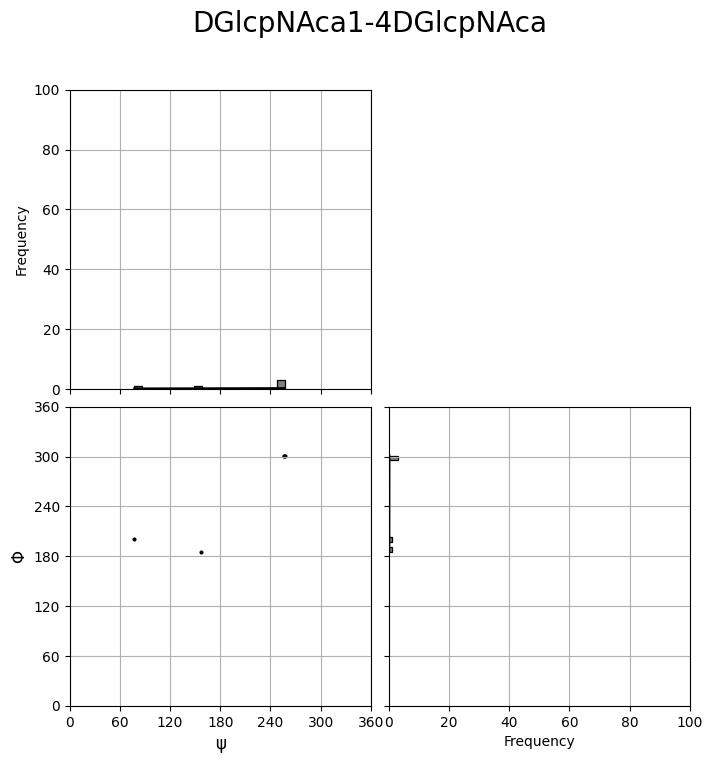

In [17]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=100,step_histogram_tick=20)